# **DAT565E-Deep Learning for Prediction of Business Outcomes**

<div class="LI-profile-badge"  data-version="v1" data-size="large" data-locale="en_US" data-type="horizontal" data-theme="light" data-vanity="drsalihtutun"><a class="LI-simple-link" href='https://www.linkedin.com/in/drsalihtutun/en-us?trk=profile-badge'>Salih Tutun, PhD</a></div>

![Imgur](https://i.imgur.com/4HJknC2.png)

In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

## Preventing overfitting and underfitting


### Overfitting and underfitting

- Movie review sentiment prediction, topic classification, and house price regression

- We could notice that the performance of our model on the held-out validation data would **always peak after a few epochs** and would then start 
degrading, i.e. our model would quickly **start to _overfit_** to the training data. 

- The fundamental issue in machine learning is the tension between optimization and generalization. 

- The goal of the game is to get good generalization, of 
course, but you do not control generalization; you can only adjust the model based on its training data.

- At the beginning of training, optimization and generalization are correlated
- But after a certain number of iterations on the training data, generalization stops improving.

- To prevent a model from learning misleading or irrelevant patterns found in the training data, _the best solution is of course to get 
more training data_. 
- Add constraints on what information it is allowed to 
store. The processing of fighting overfitting in this way is called _regularization_. 

Credit: *Chollet, Francois. Deep Learning with Python* 

Use the IMDB test set as our validation set.

Let's prepare the data from previous videos

In [ ]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 0s 0us/step


## Fighting overfitting

### Reducing the network's size


- The simplest way to prevent overfitting is to reduce the size of the model

- Deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

- We should be using models that have enough parameters that they won't be underfitting: your model shouldn't be starved for memorization resources. 

- We will have to evaluate an array of different architectures (on your validation set, not on your test set, of course) in order to find the right model size for your data. 

- The general workflow to find an appropriate model size is to start with relatively few layers and parameters, and **start increasing the size of the layers** or adding new layers until you see diminishing returns with regard to the validation loss.

Let's try this on our movie review classification network. Our original network was as such:

Credit: *Chollet, Francois. Deep Learning with Python* 

In [ ]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Now let's try to replace it with this smaller network:

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])


Here's a comparison of the validation losses of the original network and the smaller network. The dots are the validation loss values of 
the smaller network, and the crosses are the initial network (remember: a lower validation loss signals a better model).

Credit: *Chollet, Francois. Deep Learning with Python* 

In [ ]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.4833 - acc: 0.8032 - val_loss: 0.3910 - val_acc: 0.8456
Epoch 2/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.2718 - acc: 0.9083 - val_loss: 0.2874 - val_acc: 0.8885
Epoch 3/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.2049 - acc: 0.9295 - val_loss: 0.2797 - val_acc: 0.8874
Epoch 4/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.1710 - acc: 0.9404 - val_loss: 0.3082 - val_acc: 0.8775
Epoch 5/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.1433 - acc: 0.9507 - val_loss: 0.3056 - val_acc: 0.8812
Epoch 6/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.1276 - acc: 0.9556 - val_loss: 0.3254 - val_acc: 0.8762
Epoch 7/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.1090 - acc: 0.9635 - val_loss: 0.3446 - 

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 116us/step - loss: 0.6088 - acc: 0.6790 - val_loss: 0.5626 - val_acc: 0.7812
Epoch 2/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.5143 - acc: 0.8268 - val_loss: 0.5053 - val_acc: 0.8380
Epoch 3/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.4574 - acc: 0.8762 - val_loss: 0.4717 - val_acc: 0.8392
Epoch 4/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.4103 - acc: 0.9021 - val_loss: 0.4335 - val_acc: 0.8684
Epoch 5/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.3437 - acc: 0.9222 - val_loss: 0.3537 - val_acc: 0.8843
Epoch 6/20
25000/25000 [==============================] - 3s 105us/step - loss: 0.2514 - acc: 0.9350 - val_loss: 0.3028 - val_acc: 0.8864
Epoch 7/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.2033 - acc: 0.9417 - val_loss: 0.2876 - 

In [ ]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

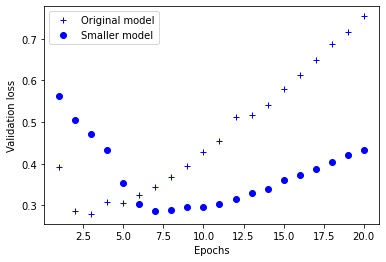

In [ ]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


As you can see, the smaller network starts overfitting later than the reference one (after 6 epochs rather than 4) and its performance 
degrades much more slowly once it starts overfitting.

Now, for kicks, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

Credit: *Chollet, Francois. Deep Learning with Python* 

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 17s 688us/step - loss: 0.4564 - acc: 0.7965 - val_loss: 0.3027 - val_acc: 0.8748
Epoch 2/20
25000/25000 [==============================] - 17s 674us/step - loss: 0.2182 - acc: 0.9135 - val_loss: 0.2979 - val_acc: 0.8797
Epoch 3/20
25000/25000 [==============================] - 17s 671us/step - loss: 0.1243 - acc: 0.9533 - val_loss: 0.3441 - val_acc: 0.8844
Epoch 4/20
25000/25000 [==============================] - 17s 677us/step - loss: 0.0818 - acc: 0.9741 - val_loss: 0.3199 - val_acc: 0.8818
Epoch 5/20
25000/25000 [==============================] - 17s 675us/step - loss: 0.0098 - acc: 0.9984 - val_loss: 0.6365 - val_acc: 0.8719
Epoch 6/20
25000/25000 [==============================] - 17s 675us/step - loss: 0.0979 - acc: 0.9872 - val_loss: 0.5193 - val_acc: 0.8788
Epoch 7/20
25000/25000 [==============================] - 17s 673us/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.

Here's how the bigger network fares compared to the reference one. The dots are the validation loss values of the bigger network, and the 
crosses are the initial network.

Credit: *Chollet, Francois. Deep Learning with Python* 

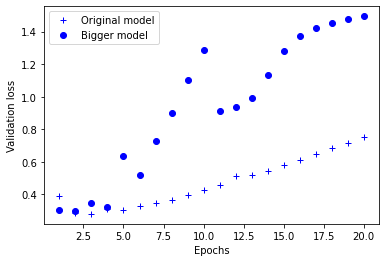

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


The bigger network starts overfitting almost right away, after just one epoch, and overfits much more severely. Its validation loss is also 
more noisy.

Meanwhile, here are the training losses for our two networks:

Credit: *Chollet, Francois. Deep Learning with Python* 

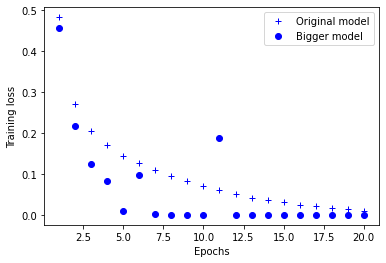

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

As you can see, the bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be 
able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large 
difference between the training and validation loss).

Credit: *Chollet, Francois. Deep Learning with Python* 

### Adding weight regularization


- The explanation most likely to be correct is the "simplest" one, and simpler models are less likely to overfit than complex ones.

- "weight regularization", it is done by adding to the loss function of the network a _cost_ associated with having large weights. This cost comes in two flavors:
    - L1 regularization, where the cost added is proportional to the _absolute value of the weights coefficients_ (i.e. to what is called the 
"L1 norm" of the weights).
    - L2 regularization, where the cost added is proportional to the _square of the value of the weights coefficients_ (i.e. to what is called 
the "L2 norm" of the weights). L2 regularization is also called _weight decay_ in the context of neural networks. Don't let the different 
name confuse you: weight decay is mathematically the exact same as L2 regularization.

In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments. Let's add L2 weight 
regularization to our movie review classification network:

Credit: *Chollet, Francois. Deep Learning with Python* 

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of 
the network. Note that because this penalty is _only added at training time_, the loss for this network will be much higher at training 
than at test time.

Here's the impact of our L2 regularization penalty:

Credit: *Chollet, Francois. Deep Learning with Python* 

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 122us/step - loss: 0.5037 - acc: 0.8229 - val_loss: 0.3991 - val_acc: 0.8704
Epoch 2/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.3240 - acc: 0.9027 - val_loss: 0.3409 - val_acc: 0.8848
Epoch 3/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.2731 - acc: 0.9198 - val_loss: 0.3472 - val_acc: 0.8776
Epoch 4/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.2527 - acc: 0.9263 - val_loss: 0.3296 - val_acc: 0.8876
Epoch 5/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.2393 - acc: 0.9318 - val_loss: 0.3336 - val_acc: 0.8860
Epoch 6/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.2333 - acc: 0.9338 - val_loss: 0.3425 - val_acc: 0.8821
Epoch 7/20
25000/25000 [==============================] - 3s 121us/step - loss: 0.2243 - acc: 0.9380 - val_loss: 0.3532 - 

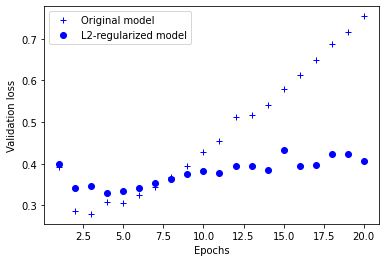

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()



As you can see, the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), 
even though both models have the same number of parameters.

As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

Credit: *Chollet, Francois. Deep Learning with Python* 

In [ ]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

### Adding dropout


- Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his 
students at the University of Toronto. 
- Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a number of output features of the layer during training. 
- Let's say a given layer would normally have returned a vector `[0.2, 0.5, 1.3, 0.8, 1.1]` for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. `[0, 0.5, 1.3, 0, 1.1]`. 
- The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to 
balance for the fact that more units are active than at training time.

- Consider a Numpy matrix containing the output of a layer, `layer_output`, of shape `(batch_size, features)`. At training time, we would be 
zero-ing out at random a fraction of the values in the matrix:

Credit: *Chollet, Francois. Deep Learning with Python* 

In [ ]:
# At training time: we drop out 50% of the units in the output
layer_output *= np.randint(0, high=2, size=layer_output.shape)


At test time, we would be scaling the output down by the dropout rate. Here we scale by 0.5 (because we were previous dropping half the 
units):

In [ ]:
# At test time:
layer_output *= 0.5


Note that this process can be implemented by doing both operations at training time and leaving the output unchanged at test time, which is 
often the way it is implemented in practice:

Dropout applied to an activation matrix

![Imgur](https://i.imgur.com/LRkj6l5.png)

In [ ]:
# At training time:
layer_output *= np.randint(0, high=2, size=layer_output.shape)
# Note that we are scaling *up* rather scaling *down* in this case
layer_output /= 0.5


- This technique may seem strange and arbitrary. Why would this help reduce overfitting? 
- Randomly removing a different subset of neurons on each 
example would prevent conspiracies and thus reduce overfitting.

- The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that are not significant (what 
Hinton refers to as "conspiracies"), which the network would start memorizing if no noise was present. 

- In Keras you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer right before it, e.g.:

Credit: *Chollet, Francois. Deep Learning with Python* 

In [ ]:
model.add(layers.Dropout(0.5))

Let's add two `Dropout` layers in our IMDB network to see how well they do at reducing overfitting:

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 134us/step - loss: 0.6204 - acc: 0.6434 - val_loss: 0.4937 - val_acc: 0.8550
Epoch 2/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.4947 - acc: 0.7701 - val_loss: 0.3831 - val_acc: 0.8769
Epoch 3/20
25000/25000 [==============================] - 3s 116us/step - loss: 0.4070 - acc: 0.8314 - val_loss: 0.3144 - val_acc: 0.8851
Epoch 4/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.3449 - acc: 0.8669 - val_loss: 0.2868 - val_acc: 0.8874
Epoch 5/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.3027 - acc: 0.8889 - val_loss: 0.2768 - val_acc: 0.8898
Epoch 6/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.2628 - acc: 0.9046 - val_loss: 0.2793 - val_acc: 0.8894
Epoch 7/20
25000/25000 [==============================] - 3s 116us/step - loss: 0.2446 - acc: 0.9135 - val_loss: 0.2927 - 

Let's plot the results:

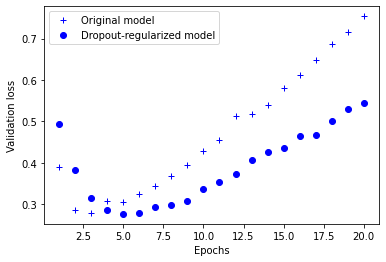

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


Again, a clear improvement over the reference network.

To recap: here the most common ways to prevent overfitting in neural networks:
* Early stop
* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.

Credit: *Chollet, Francois. Deep Learning with Python* 